# Case Intern Batch 1 - Edu

Pada case ini, kalian akan membuat sebuah Machine Learning Project sederhana, dimana kalian akan memproses sebuah dataset, dari tahap exploration , melakukan EDA, data preparation, sampai modelling serta melakukan evaluasi model.

Referensi code jika dibutuhkan, JANGAN MENJIPLAK ATAU COPY PASTE SECARA MURNI!!, konsekuensi menjiplak = 0

1. End-To-End Machine Learning (Classification): https://deepnote.com/@ayman-rafif-2814/AOL-Machine-Learning-2223-66ed99b1-0f9c-4ef2-b363-6f7df81b8d34
2. EDA: https://www.analyticsvidhya.com/blog/2020/08/exploratory-data-analysiseda-from-scratch-in-python/

### Pengenalan terhadap Dataset

Dataset yang akan digunakan adalah dataset mengenai Bank Marketing(Bank.csv), dimana sebagai seorang data scientist, kita perlu membangun sebuah model prediksi yang dapat memperkirakan apakah seorang nasabah akan menyetujui/berlangganan sebuah promosi atau marketing baru yang dibuat oleh bank, sehingga pihak bank dapat memprediksi persentase keberhasilan suatu strategi marketing agar dapat memperkirakan laba yang didapat oleh bank.

Untuk penjelasan fitur dan atribut dapat dilihat pada Bank-info.txt.

## Import Libraries

In [447]:
#Tulis semua libraries yang diperlukan disini
#setiap libraries yang ditulis diluar block code ini akan mengurangi final score sebesar 2 tiap libraries
#rerun cell code ini ketika anda menambahkan libraries baru
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


## I. Data Exploration (15%)

In [418]:
#Read Bank.csv and store it into a dataframe named df.
df = pd.read_csv("Bank.csv",sep=";")

In [419]:
#print first 5 data row from df using head()
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [420]:
#Print brief information of the dataset using info()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [421]:
#cheking the shape of the data
df.shape

(45211, 17)

In [422]:
#check whether there is duplicated data in this dataset
#write your code here

dupli_sum = df.duplicated().sum()
print(dupli_sum)

0


In [423]:
#check whether there is missing value in this dataset
#write your code here

df.isnull().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [424]:
#Rename 'y' column into 'deposit' to make easier interpretation
df.rename(columns = {'y':'deposit'}, inplace = True)
df


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [425]:
#checking numerical data descriptive statistic
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [426]:
#creating data copy for data manipulation later
df_copy = df.copy()

Berikan kesimpulan terhadap hasil yang sudah anda dapat di Data Exploration!

# Data Exploration

the first step we need to do is read or import the dataframe into a variable df.
Then we look the first 5 data with df.head(), using df.info() we can get the information of the dataframe, there is 17 Column, and each column no-NULL count, with the datatype of each column.
then we run df.shape for checking the dataframe shape which is 45211 rows with 17 columns.

below is the description of each column from Bank-Info.txt

1 - age (numeric)

2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 

3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4 - education (categorical: "unknown","secondary","primary","tertiary")

5 - default: has credit in default? (binary: "yes","no")

6 - balance: average yearly balance, in euros (numeric) 

7 - housing: has housing loan? (binary: "yes","no")

8 - loan: has personal loan? (binary: "yes","no")
related with the last contact of the current campaign:

9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 

10 - day: last contact day of the month (numeric)

11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

12 - duration: last contact duration, in seconds (numeric)
other attributes:

13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

17 - y - has the client subscribed a term deposit? (binary: "yes","no")

next step, is checking whether there is duplicated data or not, using the function .duplicated().sum() we found that the data having 0 duplicated data
we also need to check the missing value of the dataset, using  .isnull().sum() we can say that the data is all filled by values.

from the dataset info we can see that there is one column that named 'y' which is the target of prediction, for clearing confusion i decided to rename it to 'deposit'.

i also check the descriptive statistic of the numerical data using .describe() this function help us to show the central tendencies of each numerical data.

then we copy the dataframe variable into new variable before we started to manipulate the dataset in next section, Exploratory Data Analysis.


## II. Exploratory Data Analysis (30%)

In [427]:
#Make at least 1 univariate analysis, 1 bivariate analysis, 1 multivariate analysis , and correlation heatmap plot
#Make sure that your plot contains title, xlabel,ylabel, and all neccesary attributes to create a good explanatory plot
#Don't forget to write your analysis for each analysis/plot you make

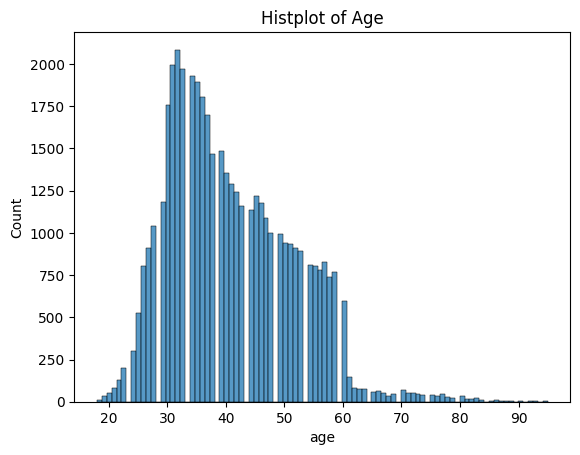

In [428]:
sns.histplot(df['age'])
plt.title("Histplot of Age")
plt.show()

this is the histplot of age distribution. From this plotting we can see that the most age group that use bank is age 20-60 years old, as we can see the peak is 32 Age.
beyond age 60, not many clients of the bank.

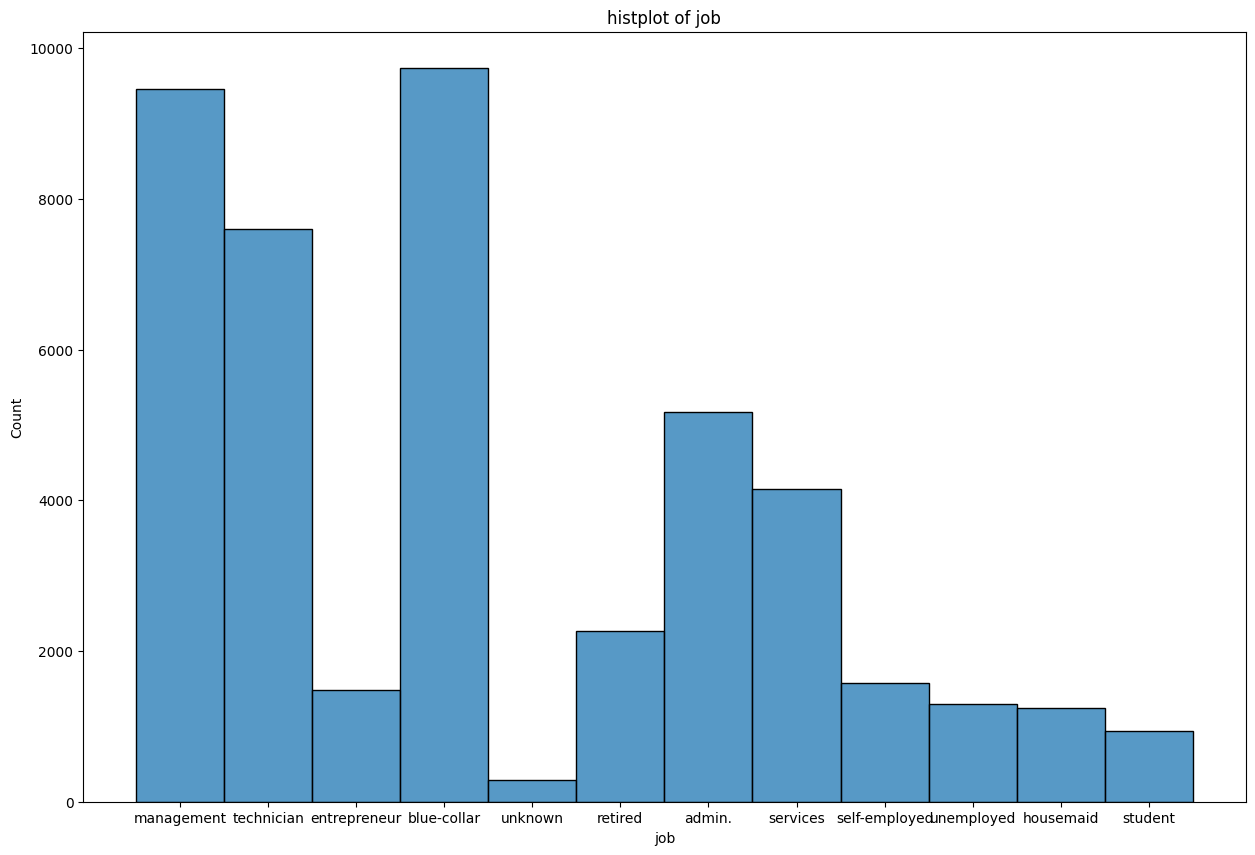

In [429]:
plt.figure(figsize=[15,10])
sns.histplot(df['job'])
plt.title("histplot of job")
plt.show()

plotting the job let us know that the most client working as blue-collar as the peak and followed by management and technician, as clients of the bank. there also some input that its value is unknows shows that some clients inputing the job field or maybe jobless.

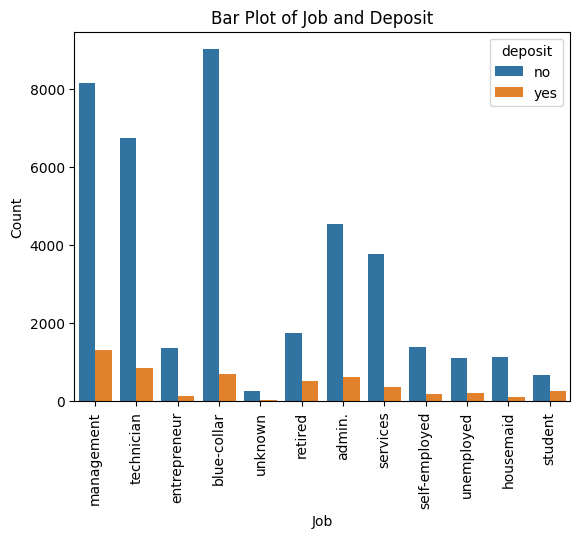

In [430]:
sns.countplot(x='job', hue='deposit', data=df)
plt.title('Bar Plot of Job and Deposit')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

this plot using 2 variable, which is job and deposit. wheter each occupation going on deposit or not. as we can see that most of the client not subscribed to the deposit.

yet we can see every occupation or job having 10-15% that subscribed to the deposit.

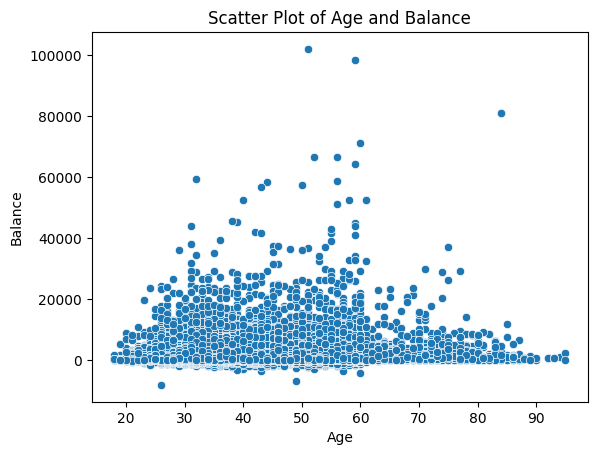

In [431]:
sns.scatterplot(x='age', y='balance', data=df)
plt.title('Scatter Plot of Age and Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()

the distribution of balance and age can seen above that not many client that reach the balance of 60000 euros. most of the majority clients distribution having balance between 0 to 4000 euros.

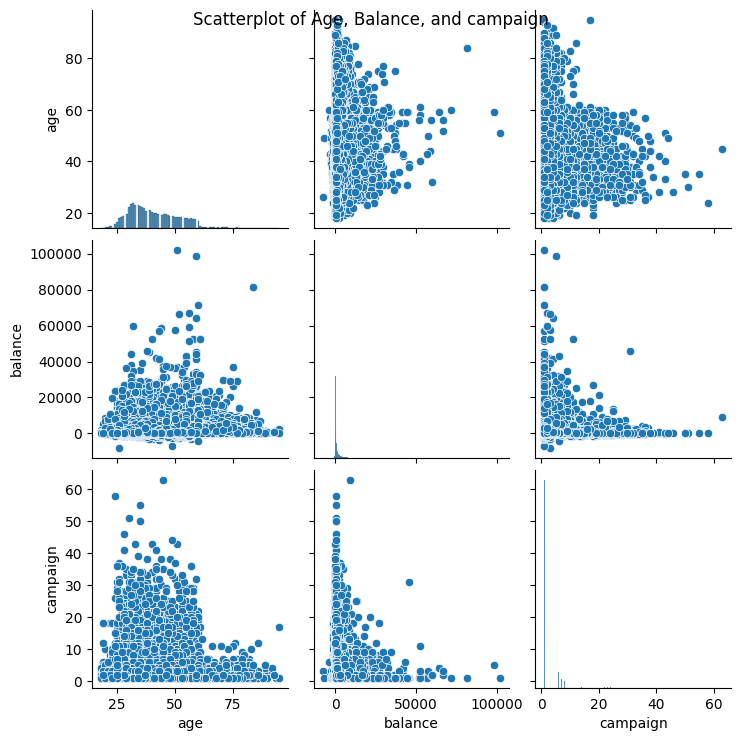

In [432]:
sns.pairplot(data=df, vars=["age", "balance", "campaign"])
plt.suptitle('Scatterplot of Age, Balance, and campaign')
plt.show()


in this part i use age, balance, and campaign. as we can see that age and age don't correlate that much but we can see that age and balance part that have been explained above, then there is campaign and age as we can see that among age 20 untill 60 is the area of many contact performed then above 60.

then in balance part we can see that the least balance, the more contact happen in the campaign, as in the plotting we can see that many campaigh happen at the balance near to 0.

lastly campaign part that already explained, balance with campaign, and campaign with campaign that no correlate.

/tmp/ipykernel_441/2223094286.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


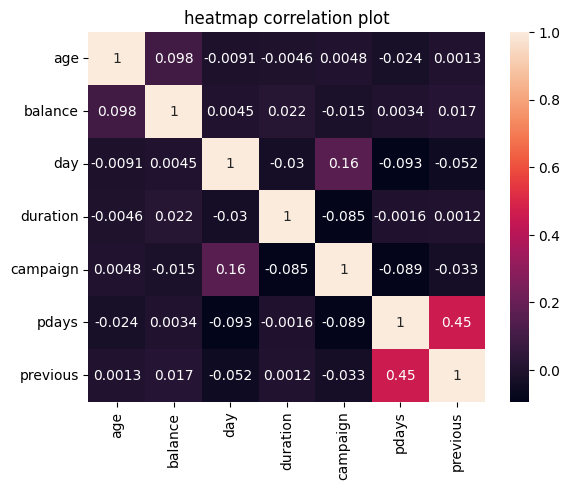

In [433]:
sns.heatmap(df.corr(), annot=True)
plt.title("heatmap correlation plot")
plt.show()

lastly, there is heatmap that we can see the correlation of each numerical data.
we can see that mostly the data not really correlate to each other. the highest correlation that show in pdays with previous column with 0.45, else columns show very weak correlation.

## III. Feature Engineering (15%)

In [434]:
#Using label encoding method, encode all categorical column into numeric

In [435]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [436]:
# creating a mapping for encoding the job and applying the endcoding
jobmapping = {'blue-collar': 0,'management': 1, 'technician': 2, 'admin.': 3, 'services': 4, 'retired': 5, 'self-employed': 6, 'entrepreneur': 7, 'unemployed': 8, 'housemaid': 9, 'student': 10, 'unknown': 11}
df['job'] = df['job'].map(jobmapping) 
# creating a mapping for encoding the marital and applying the endcoding
maritalmapping = {'married': 0, 'single': 1, 'divorced': 2}
df['marital'] = df['marital'].map(maritalmapping)
# creating a mapping for encoding the education and applying the endcoding
educationmapping = {'unknown': 0, 'secondary': 1, 'primary': 2, 'tertiary': 3}
df['education'] = df['education'].map(educationmapping)
# creating a mapping for encoding the default and applying the endcoding
defaultmapping = {'no': 0, 'yes': 1}
df['default'] = df['default'].map(defaultmapping)
# creating a mapping for encoding the housing and applying the endcoding
housingmapping = {'no': 0, 'yes': 1}
df['housing'] = df['housing'].map(housingmapping)
# creating a mapping for encoding the loan and applying the endcoding
loanmapping = {'no': 0, 'yes': 1}
df['loan'] = df['loan'].map(loanmapping)
# creating a mapping for encoding the deposit and applying the endcoding
depositmapping = {'no': 0, 'yes': 1}
df['deposit'] = df['deposit'].map(depositmapping)

df = df.drop(['contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome'], axis=1)

df.head()

,age,job,marital,education,default,balance,housing,loan,deposit
0,58,1,0,3,0,2143,1,0,0
1,44,2,1,1,0,29,1,0,0
2,33,7,0,1,0,2,1,1,0
3,47,0,0,0,0,1506,1,0,0
4,33,11,1,0,0,1,0,0,0


In [437]:
#Create 2 variable named X and Y, where X contains all independent variables and Y contains target variable
#write your code here

x = df.drop(['deposit'], axis=1)
y = df['deposit']

In [438]:
#Do feature scaling on all independent variables stored in X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [439]:
#separate both X and Y to training and testing set with proportion of test size of 20%
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [440]:
#print shape of each train and testing set that already separated
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", Y_train.shape)
print("Shape of y_test:", Y_test.shape)

Shape of X_train: (36168, 8)
Shape of X_test: (9043, 8)
Shape of y_train: (36168,)
Shape of y_test: (9043,)


## IV. Modelling (15%)

In [441]:
#Build 2 machine learning model and evaluate both model with its accuracy score.

In [442]:
#build model 1
# Create the model
dtc = DecisionTreeClassifier()

# Fit the model on the training data
dtc.fit(X_train, Y_train)

DecisionTreeClassifier()

In [450]:
#evaluate model 1
# Make predictions on the testing data
y_pred = dtc.predict(X_test)

print(classification_report(Y_test, y_pred))

# model accuracy
print("Decision Tree Accuracy : {:.2f}%".format((accuracy_score(Y_test, y_pred))*100))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      7952
           1       0.32      0.33      0.33      1091

    accuracy                           0.83      9043
   macro avg       0.61      0.62      0.62      9043
weighted avg       0.84      0.83      0.84      9043

Decision Tree Accuracy : 83.32%


In [453]:
#build model 2
# Create the random forest classifier model
rfc = RandomForestClassifier()

rfc.fit(X_train, Y_train)

RandomForestClassifier()

In [456]:
#evaluate model 2
# Make predictions on the testing data
y_pred_rfc = rfc.predict(X_test)
print(classification_report(Y_test, y_pred_rfc))
print("Random Forest Classifier accuracy : {:.2f}%".format((accuracy_score(Y_test, y_pred_rfc))*100))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      7952
           1       0.48      0.27      0.35      1091

    accuracy                           0.88      9043
   macro avg       0.69      0.62      0.64      9043
weighted avg       0.85      0.88      0.86      9043

Random Forest Classifier accuracy : 87.70%


On your perspective, which model performs better on this classification problem? Explain your answer!

using these 2 model we can see that random forest classifier have better accuracy then decision tree classifier, with 87.70%. yet we see at the report random forest got better precision, recall, and F1-score. to summarize, random forest classifier more fitting or performs better on this problem.

## V. Video Explanation(10%)

Create an explanation video only on EDA Part (Part II), maximum time of the video is 5 minutes, explain all your plot and what insight that you get clearly and briefly.

Make sure your video link could be accessed and viewed, else your point will not counted

Copy your Link Here : https://binusianorg-my.sharepoint.com/personal/marvin_sachio_binus_ac_id/_layouts/15/guestaccess.aspx?docid=0ae578c95df8548d7affa579e662f1f48&authkey=Ad89U8k-FIW1QXywHRKQeAQ&e=x31pJT